---
title: 'Announcing the pharmacophore-toolkit!'
subtitle: 'Where I Generate Simple Pharmacophore Models'
author: 'Tony E. Lin'
date: '2025-07-23'
image: img/pharmacophore-demo.gif
categories: [Small-Molecules, Python, Python Project, Pharmacophore, RDKit, PyMOL, Drawing]
---

# Introducing pharmacophore-toolkit

For the past year, I have been absent from this space. That doesn't mean I haven't been busy! Lately my interests have shifted to making apps targeting cheminformatics and drug discovery. My target audience is my lab members, but I have also released the tools for the wider public. One that I am happy to have recently created is the [pharmacophore-toolkit](https://github.com/tlint101/pharmacophore-toolkit).

## Motivation
There are plenty of tools available to model Structure-Activity Relationship (SAR). Famous software suites include [Cresset Flare](https://cresset-group.com) or [Schrödinger Maestro](https://www.schrodinger.com/platform/products/maestro/) ([video tutorial here](https://youtu.be/0MbUtgoX3Ys)). I particularly like Flare for their [Activity Miner](https://cresset-group.com/software/activityminer/) tool. Schrödinger has a great docking module, but is also equipped with additional computational tools that support molecular designs. The aforementioned programs, and other computational pieces of software that support drug design, are great in their own right.

Nonetheless, many of these tools require a subscription. Depending on your goals, paying for a subscription and not utilizing all of the tools can be a downer. Some software suites may offer an academic license, but with a severe lock on the “fancier” tools. Luckily, there are plenty of open source tools that you can combine, along with some elbow grease, to create a tool that works in a similar way.

Thus, pharmacophore-toolkit was born. I wanted to make a script that is, hopefully, easy to use and can generate informative images for analysis and communication between lab groups.

The below is a short demo adapted from the pharmacophore-toolkit tutorial [here](https://github.com/tlint101/pharmacophore-toolkit/blob/main/tutorials/pharmacophore_tutorial.ipynb).

## Demo

### Import Modules
In this project, we will import rdkit and the pharmacophore-toolkit (pharmacophore) and their associated modules.

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolAlign
from rdkit.Chem.Draw import MolsToGridImage
from pharmacophore import Pharmacophore, Draw, View

### Dataset
The example compounds include three molecules that binds to the serotonin receptor [5HT-2A](https://en.wikipedia.org/wiki/5-HT2A_receptor). This protein belongs to the larger GPCR family of proteins and is famous for having a central role in psychedelic drugs such as LSD and psylocibin mushrooms. Fun stuff! The three molecules in this example will include serotonin (duh!), [psilocin](https://en.wikipedia.org/wiki/Psilocin) (🍄), and [mescaline](https://en.wikipedia.org/wiki/Mescaline)(🌵).

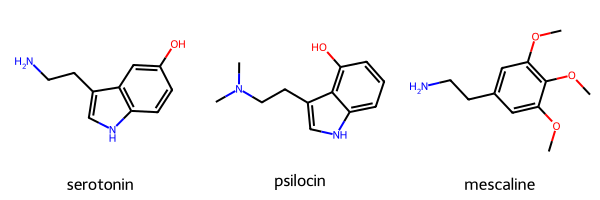

In [2]:
molecules = {"serotonin": "C1=CC2=C(C=C1O)C(=CN2)CCN",
             "psilocin": "CN(C)CCc1c[nH]c2cccc(O)c12",
             "mescaline": "O(c1cc(cc(OC)c1OC)CCN)C"}

mol_smi = [x for x in molecules.values()]
mol_name = [x for x in molecules.keys()]
mols = [Chem.MolFromSmiles(x) for x in mol_smi]

MolsToGridImage(mols=mols, legends=mol_name)

### Compound Preparation
For effective pharmacophore modeling, the molecules need to be rendered with their 3D conformation. This can come from a variety of ways. To keep things simple, the 3D conformation of the molecules in this demo will be generated using RDKit.

In [3]:
# generating 3D conformation
mols = [Chem.AddHs(m) for m in mols]
ps = AllChem.ETKDGv3()
ps.randomSeed = 42
for m in mols:
    AllChem.EmbedMolecule(m,ps)

# aligning the molecules
aligned = []
for x in mols:
    mol_aligned = rdMolAlign.GetO3A(x,mols[0])
    aligned.append(mol_aligned.Align())

The molecules should now be drawn with 3D coordinates. This can be visualized by drawing the molecules. Notice that the molecules are drawn differently on a 2D plane.

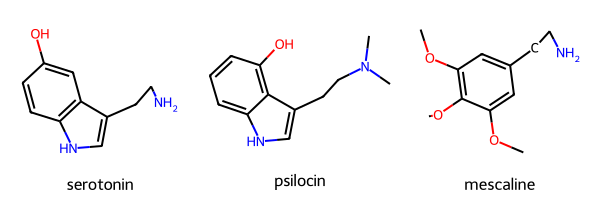

In [4]:
mols_noH = [Chem.RemoveHs(m) for m in mols]  # remove hydrogens for clarity.

MolsToGridImage(mols=mols_noH, legends=mol_name)

### Pharmacophore
There are three ways to generate pharmacophores - an interactive 3D widget using py3Dmol, as a .xyz file for use in PyMOL, and as a 2D image as a .png file.

#### Genearte Pharmacophore Features
First, the pharmacophore features will need to be generated. As of this version, only one pharmacophore can be generated at a time. In this example, pharmacophores for the first molecule, serotonin, will be generated. this will produce a list of lists, with each list containing the pharmacophore label, its atom position, and XYZ coordinates. Once calculated, this data will be used to render the pharmacophores for the images.

In [5]:
# default
pharm = Pharmacophore()
pharma = pharm.calc_pharm(mols_noH[0])
pharma

[['Donor', (9,), -0.9046174520168838, -2.235699615827842, 0.13645934200480056],
 ['Donor', (12,), 2.949925200279259, -0.15648413497184238, 1.2254205073233995],
 ['Donor', (6,), -2.5995394084260526, 2.931207478597561, -0.5905278269049035],
 ['Aromatic',
  (0, 1, 2, 3, 4, 5),
  -1.8583650464904398,
  0.2926900071440297,
  -0.1871054571985934],
 ['Aromatic',
  (2, 3, 7, 8, 9),
  -0.384216675975982,
  -1.2654866328983938,
  -0.21240652662909393]]

#### py3DMol
The pharmacophores generated above are now ready to be used for generating pharmacophores. Each pharmacophore is represented as a sphere with the centroid located on the atom. Currently, the pharmacophores were only generated once for the first molecule. So while the **view()** method contains a dropdown menu to select from list of molecules, the drawn pharmacophores will only correspond to the pharmacophore list generated from the code block above. In this case, serotonin.

In [6]:
v = View()
v.view(mols_noH, pharma, labels=True, window=(500, 500))

interactive(children=(Dropdown(description='Select:', options=(('Molecule 1', 0), ('Molecule 2', 1), ('Molecul…

<img src="img/pharmacophore-demo.gif" alt="serotoning-pharmacophore-toolkit" width="35%">

**NOTE:** This code block generates an interactive window and is intended for use in Jupyter Notebooks only. It cannot be rendered for this blog post (static webpage). Instead, a gif of the window is included.

The **view()** method can also handle a list of pharmacophores. This has the benefit of changing the pharmacophore spheres with each rendered molecule. This is done by generating multiple pharmacophores and including the results ina list. An example of this is as follows:

In [7]:
pharma = []
for x in mols_noH:
    calc = pharm.calc_pharm(x)
    pharma.append(calc)

#### .xyz file for PyMol
The pharmacophores-toolkit can generate a .xyz file to be used with PyMOL. This contains information for the pharmacophores - 3D coordinates, sphere color, sphere size, etc. Once this is generated, users can drag and drop this file into their PyMOL application to render the pharmacophore with their molecule. The resulting images should generate pharmacophore spheres superimposed on the molecule. The output will give a message describing the number of pharmacophore features generated.

In [8]:
pharm.output_features(savepath='pharma.pml')

Number of features: 8
Feature visualization script written to pharma.pml.


In this case, the pharmacophore features for the last item in the list is generated. This should correspond with mescalin.

<img src="img/pharmacophore-pymol-example.png" alt="pharmacophore-pymol-example" width="50%">

**NOTE:** A sample image of what this would look like in pymol is given here. Like the interactive module above, the pharmacophores will need to be rendered for each molecule separately. In this example, the pharmacophores for serotonin were generated. The psilocin and mescaline molecules were drawn with the serotonin pharmacophore spheres to highlight their structural differences.

#### A 2D Image
Finally, a 2D image can be generated with spheres highlighting the pharmacophores. Images were drawn using RDKit and colored by their respective pharmacophores.

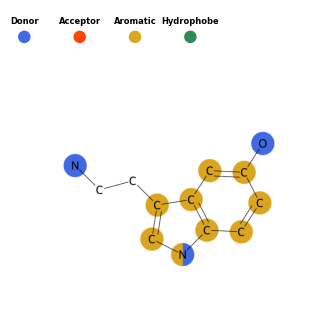

In [9]:
draw = Draw()
draw.draw_pharm(mols_noH[0])

# Conclusion
And that’s it! The final results don’t look that bad. I’ve used it for a side project and, depending on how others go, I may use it for others. I find this a quick and easy way to generate analysis of interesting compounds and it helps explain my ideas to collaborators. Pretty neat!

The final results, as of this writing, only highlights the pharmacophore spheres for a specific molecule. No activity cliffs are considered. Activity cliffs are handy as it more illustrates areas for modification - a common “next step” for drug design. That said, I believe an experienced computational chemist should be able to gauge these design tricks by the images generated using the pharmacophore-toolkit. I would still like to add activity cliffs or  something similar in the future. Or if others know how, please set up a pull request!

Thanks for reading!